# File for checking import and first visualization
cifar consists of 5 batches (downloaded from http://www.cs.toronto.edu/~kriz/cifar.html)
data is stored in data/cifar/cifar-10-batches-by
code for automatic download in solution from deep-diver (uncommented)

In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import os

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## own solution

### Dataset importing

In [3]:
def unpickle(file):
    """
    returns a  from cifar data
    :param file:
    :return:
    """
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def load_train_test_data(path_to_data='data/cifar/cifar-10-batches-py'):
    """
    :param path_to_data: path to
    :return: X_train, y_train, X_test, y_test, label_names
    """

    dict_b1 = unpickle(path_to_data + "/data_batch_1")
    dict_b2 = unpickle(path_to_data + "/data_batch_2")
    dict_b3 = unpickle(path_to_data + "/data_batch_3")
    dict_b4 = unpickle(path_to_data + "/data_batch_4")
    dict_b5 = unpickle(path_to_data + "/data_batch_5")
    dict_meta = unpickle(path_to_data + "/batches.meta")
    dict_test = unpickle(path_to_data + "/test_batch")

    data_b1 = dict_b1[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2,3,1)
    data_b2 = dict_b2[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2,3,1)
    data_b3 = dict_b3[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2,3,1)
    data_b4 = dict_b4[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2,3,1)
    data_b5 = dict_b5[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2,3,1)
    labels_b1 = dict_b1[b'labels']
    labels_b2 = dict_b2[b'labels']
    labels_b3 = dict_b3[b'labels']
    labels_b4 = dict_b4[b'labels']
    labels_b5 = dict_b5[b'labels']


    X_test = dict_test[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2,3,1)
    y_test = np.array(dict_test[b'labels'])
    X_train = np.concatenate([data_b1, data_b2, data_b3, data_b4, data_b5])
    y_train = np.concatenate([labels_b1, labels_b2, labels_b3, labels_b4, labels_b5])
    label_names = dict_meta[b'label_names']
    label_names = [name.decode('utf-8') for name in label_names]  # encode (remove b'')

    return X_train, y_train, X_test, y_test, label_names



In [5]:
X_train, y_train, X_test, y_test, label_names = load_train_test_data()

In [12]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000,)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000,)


In [13]:
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1))
y_test_encoded = encoder.transform(y_test.reshape(-1,1))

In [16]:
print("Shape of y_train_encoded: ", y_train_encoded.shape)
print("Shape of y_test_encoded: ", y_test_encoded.shape)

Shape of y_train_encoded:  (50000, 10)
Shape of y_test_encoded:  (10000, 10)


In [34]:
print("Training set")
num_classes = len(np.unique(y_train))
num_per_class = np.zeros(num_classes)
for i in range(0, num_classes):
    num_per_class[i] = len(y_train == i)
    print("Class", i, "-", label_names[i], ":", int(num_per_class[i]), "images")

print("_______________________")
print("Testing set")
num_classes = len(np.unique(y_test))
num_per_class_test = np.zeros(num_classes)
for i in range(0, num_classes):
    num_per_class_test[i] = len(y_test == i)
    print("Class", i, "-", label_names[i], ":", int(num_per_class_test[i]), "images")


Training set
Class 0 - airplane : 50000 images
Class 1 - automobile : 50000 images
Class 2 - bird : 50000 images
Class 3 - cat : 50000 images
Class 4 - deer : 50000 images
Class 5 - dog : 50000 images
Class 6 - frog : 50000 images
Class 7 - horse : 50000 images
Class 8 - ship : 50000 images
Class 9 - truck : 50000 images
_______________________
Testing set
Class 0 - airplane : 10000 images
Class 1 - automobile : 10000 images
Class 2 - bird : 10000 images
Class 3 - cat : 10000 images
Class 4 - deer : 10000 images
Class 5 - dog : 10000 images
Class 6 - frog : 10000 images
Class 7 - horse : 10000 images
Class 8 - ship : 10000 images
Class 9 - truck : 10000 images


### Dataset visualizations

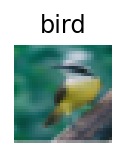

In [7]:
# Choose an index to select an image from the dataset
index = 27001

# Set the figure size
plt.figure(figsize=(0.9, 0.9))

# Get the image and label
image = X_train[index]
label = y_train[index]

# Plot the image
plt.imshow(image)
plt.title(label_names[label])
plt.axis('off')
plt.show()

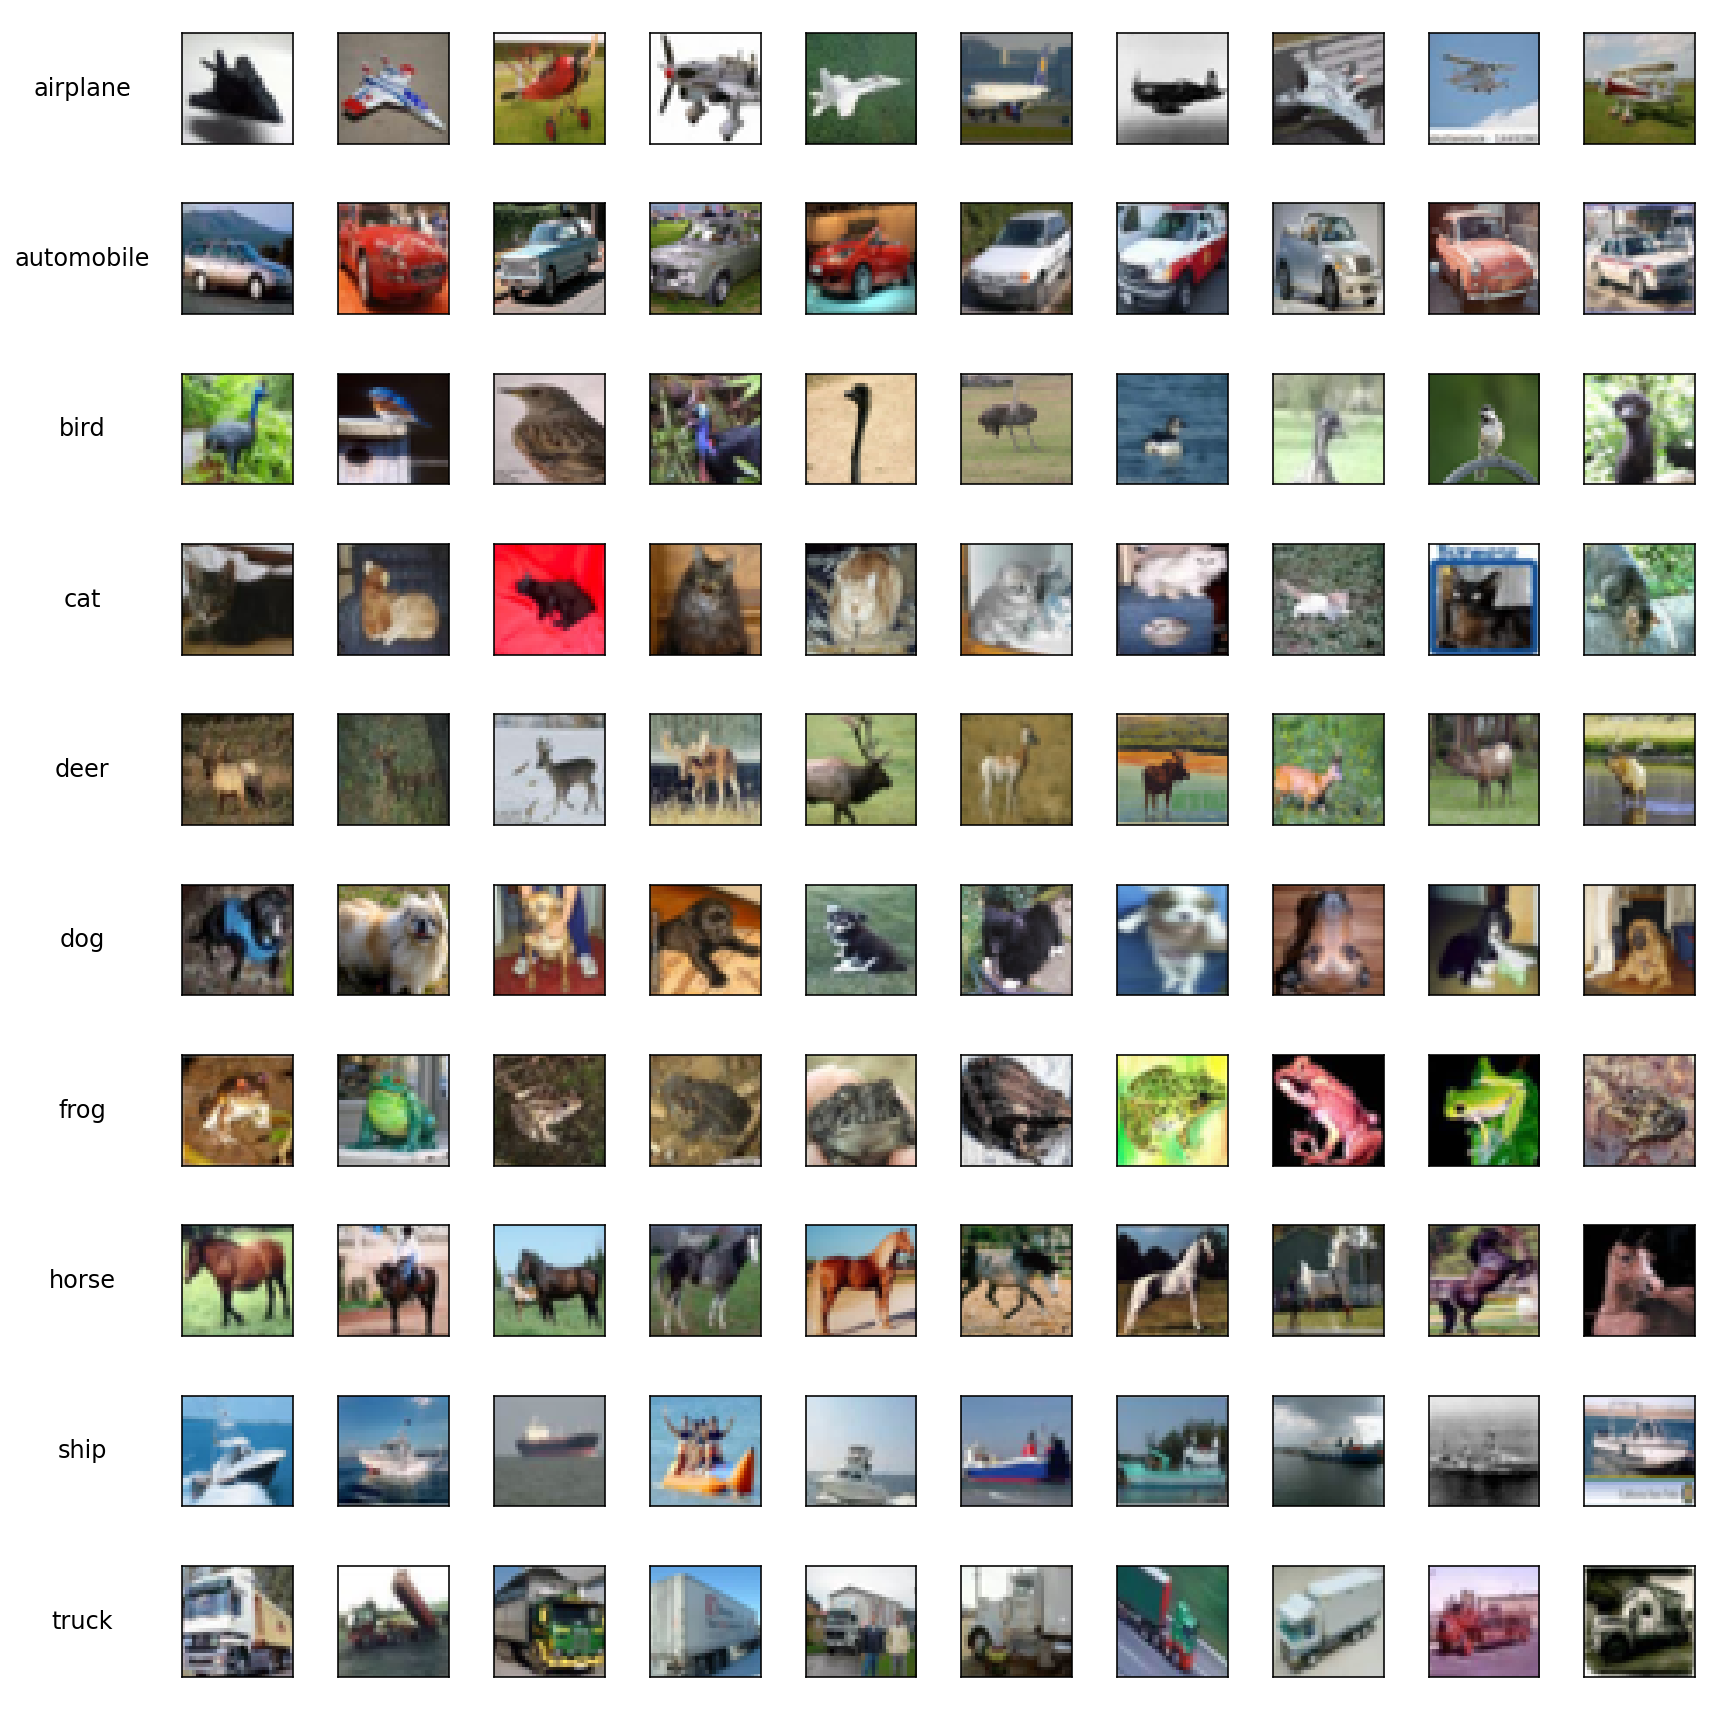

In [64]:
fig, ax = plt.subplots(nrows=num_classes, ncols=11, figsize=(12, 12))

for i in range(0, num_classes):
    indices = np.where(y_train == i)[0]
    indices = indices[:10] # first 10 images belonging to i-th class 
    for j in range(0, 10):
        img = X_train[indices[j], :, :, :]
        ax[i, j+1].imshow(img)
        ax[i, j+1].set_xticks([]); ax[i, j+1].set_yticks([])
        ax[i, j+1].set_xticklabels([]); ax[i, j+1].set_yticklabels([])
    # ax[i, 4].set_title(label_names[i], fontsize=14, loc='center')
    ax[i, 0].text(0.5, 0.5, label_names[i], fontsize=12, ha='center', va='center')
    ax[i, 0].set_xticks([]); ax[i, 0].set_yticks([])
    ax[i, 0].set_xticklabels([]); ax[i, 0].set_yticklabels([])

    # remove frame of the plot by setting spines visibility to False
    for spine in ax[i, 0].spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

## Data From tensorflow

In [ ]:
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(X_train_tf, y_train_tf), (X_test_tf, y_test_tf) = cifar10.load_data()
print(X_train_tf.shape, y_train_tf.shape, X_test_tf.shape, y_test_tf.shape)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## Solution from deep-diver
https://github.com/deep-diver/CIFAR10-img-classification-tensorflow/blob/master/CIFAR10_image_classification.ipynb

In [ ]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import tarfile

# cifar10_dataset_folder_path = 'cifar-10-batches-py'  # not used -> changed to os.getcwd + '/data/...
cd = os.getcwd()
cifar10_dataset_folder_path = cd + '/data/cifar/cifar-10-batches-py'

# class DownloadProgress(tqdm):
#     last_block = 0
#
#     def hook(self, block_num=1, block_size=1, total_size=None):
#         self.total = total_size
#         self.update((block_num - self.last_block) * block_size)
#         self.last_block = block_num
#
# """
#     check if the data (zip) file is already downloaded
#     if not, download it from "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz" and save as cifar-10-python.tar.gz
# """
# if not isfile('cifar-10-python.tar.gz'):
#     with DownloadProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
#         urlretrieve(
#             'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
#             'cifar-10-python.tar.gz',
#             pbar.hook)
#
# if not isdir(cifar10_dataset_folder_path):
#     with tarfile.open('cifar-10-python.tar.gz') as tar:
#         tar.extractall()
#         tar.close()

In [ ]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

In [ ]:
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))

    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))

    plt.imshow(sample_image)

In [ ]:
# Explore the dataset
batch_id = 3
sample_id = 7000
cd = os.getcwd()
print(cd)
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [ ]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))

    for idx, val in enumerate(x):
        encoded[idx][val] = 1

    return encoded

In [ ]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)

        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation],
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [ ]:
# preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [ ]:
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [ ]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

In [ ]:
a, b = load_cfar10_batch('data/cifar/cifar-10-batches-py', 1)


In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from tf.keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
data_b1[10].reshape(-1,3,32,32)

In [ ]:
trainX[i]

In [ ]:
plt.imshow(a[20].reshape(32,32,3))